In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


In [25]:
predictpd=pd.read_csv("gold_sv_1.csv",header=None,sep=',')
predictpd=predictpd.values
pp=pd.read_csv("output",header=None,sep=',')
pp=pp.values
print (predictpd.shape)
print(pp.shape)


(10000, 1)
(10000, 1)


In [21]:
print ((np.sum((pp==predictpd).astype(int)))/(float(pp.shape[0])))

0.9729


In [26]:
xx=pd.read_csv("Dataset/mnist/fortest.csv",header=None,sep=',')
xx=xx.values

In [8]:
def getConfusionMatrix(y1,y2):
    conf=np.zeros((10,10))
#     dd={1:0,2:1,3:2,4:3,7:4,8:5,9:6,10:7}
    
    ins=len(y1)
    
    for i in range(ins):
        conf[y1[i],y2[i]]+=1
    
    return conf

In [11]:
confuse=getConfusionMatrix(predictpd,pp).astype(int)

In [12]:
confuse

array([[ 969,    0,    1,    0,    0,    3,    4,    1,    2,    0],
       [   0, 1122,    3,    2,    1,    2,    2,    0,    2,    1],
       [   4,    0, 1000,    4,    2,    0,    1,    6,   15,    0],
       [   0,    0,    8,  985,    0,    4,    0,    7,    5,    1],
       [   1,    0,    4,    0,  962,    0,    5,    0,    2,    8],
       [   2,    0,    3,    6,    1,  866,    7,    1,    5,    1],
       [   5,    4,    0,    0,    3,    4,  940,    0,    2,    0],
       [   1,    4,   20,    2,    3,    0,    0,  986,    2,   10],
       [   4,    0,    3,   10,    1,    5,    3,    3,  942,    3],
       [   4,    4,    3,    8,    9,    4,    0,    9,   11,  957]])

In [17]:
class_names=np.array([0,1,2,3,4,5,6,7,8,9])

Confusion matrix, without normalization
[[ 969    0    1    0    0    3    4    1    2    0]
 [   0 1122    3    2    1    2    2    0    2    1]
 [   4    0 1000    4    2    0    1    6   15    0]
 [   0    0    8  985    0    4    0    7    5    1]
 [   1    0    4    0  962    0    5    0    2    8]
 [   2    0    3    6    1  866    7    1    5    1]
 [   5    4    0    0    3    4  940    0    2    0]
 [   1    4   20    2    3    0    0  986    2   10]
 [   4    0    3   10    1    5    3    3  942    3]
 [   4    4    3    8    9    4    0    9   11  957]]


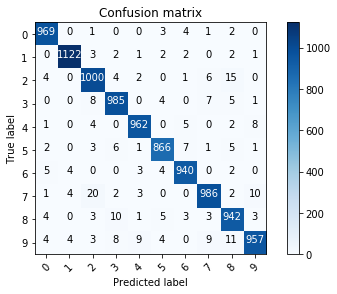

In [18]:
plt.figure()
plot_confusion_matrix(confuse.astype(int), classes=class_names,
                      title='Confusion matrix')
plt.show()

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
predictpd=pd.read_csv("",header=None,sep=',')

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_test_10.csv'

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_test_10.csv'

In [28]:
ins=pp.shape[0]
print(ins)
print(xx.shape)

10000
(10000, 784)


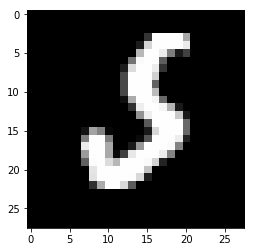

In [32]:
counter=0
for i in range(ins):
    if(pp[i,0]!=predictpd[i,0]):
        counter+=1
        pixels = np.array(xx[i,:], dtype='uint8')
        pixels = pixels.reshape((28, 28))
#         plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.savefig("Plots/Cor_"+str(predictpd[i])+"Pred_"+str(pp[i])+"_"+str(i)+'.png')

        